# **1. 코사인 유사도: 문서의 유사도 구하기**

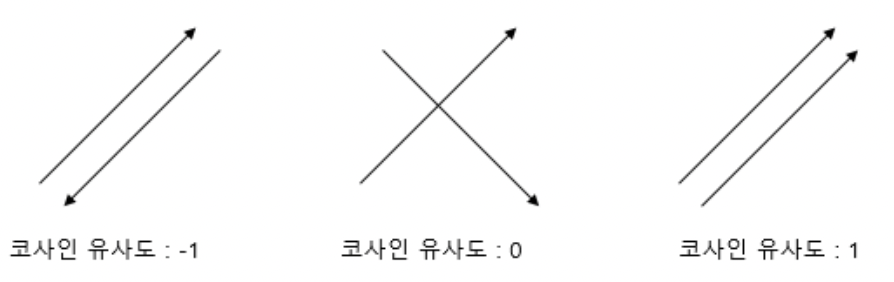

# 1) 코사인 유사도

- 두 벡터 간 코사인 각도로 유사도를 구하는 것

- -1 이상 1 이하의 값을 가짐 (cos180, cos0)

즉 **두 벡터가 가리키는 방향이 얼마나 유사한지를 의미.**



In [ ]:
# ex. '저는 사과 좋아요', '저는 바나나 좋아요', '저는 바나나 좋아요 저는 바나나 좋아요'

import pandas as pd

docs = [
        '저는 사과 좋아요',
        '저는 바나나 좋아요',
        '저는 바나나 좋아요 저는 바나나 좋아요'
]

vocab = list(set(w for doc in docs for w in doc.split())) #단어리스트
vocab.sort() 

def tf(t,d):
  return d.count(t)

N = len(docs) #문장(문서) 수
result = []

for i in range(N):
  result.append([])
  d = docs[i] #문서1, 문서2, 문서3
  for j in range(len(vocab)):
    t = vocab[j] #바나나, 사과, 저는, 좋아요
    result[-1].append(tf(t,d)) #문서별 term frequency

print(result)
tf_ = pd.DataFrame(result, index = ['문서1','문서2','문서3'], columns = vocab)
tf_


[[0, 1, 1, 1], [1, 0, 1, 1], [2, 0, 2, 2]]


,바나나,사과,저는,좋아요
문서1,0,1,1,1
문서2,1,0,1,1
문서3,2,0,2,2


In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm #norm = 벡터의 크기/길이

def cos_sim(A,B):
  return dot(A,B) / (norm(A)*norm(B))

# a dot b = norm(a)norm(b)cos(@) 이므로


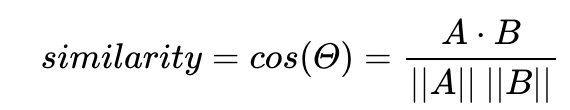

In [ ]:
doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

print(cos_sim(doc1,doc2))
print(cos_sim(doc2,doc3))
print(cos_sim(doc3,doc1))


0.6666666666666667
1.0000000000000002
0.6666666666666667



문서 1,3과 문서 1,2의 유사도가 같고, 문서2,3의 유사도는 1이다.

-> 모든 단어의 **빈도수가 동일하게 증가(문서3)하면, 기존 문서와 유사도는 1이다.**

코사인 유사도 - 크기(문서길이)가 아닌 방향(문서의 패턴) 기준이므로 문서의 길이가 달라도 공정한 비교 가능

# 2) 영화 추천 시스템 만들기

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
import io
data = pd.read_csv('movies_metadata.csv', low_memory=False)
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [ ]:
#좋아하는 영화 입력하면, 줄거리가 유사한 영화를 찾아 추천하는 시스템

data = data.head(20000) # 훈련 데이터 양 조절가능

In [ ]:
print(data['overview'])

0        Led by Woody, Andy's toys live happily in his ...
1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
                               ...                        
19995    Dissidents in a French colony attack a police ...
19996    A young mother Nina and her son Enzo find them...
19997    An in-depth analysis of the relationship betwe...
19998    Follows the life and work of animator Lotte Re...
19999    An in-depth look at the genesis, production, a...
Name: overview, Length: 20000, dtype: object


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data['overview'].isnull().sum()
# null값이 있으면 tf-idf 에러 발생.

135

In [ ]:
data['overview'] = data['overview'].fillna('')

# dataframe(pandas)에서는 fillna() 이용해 null값을 대체할 수 있음

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['overview']) # 스케일링, 벡터화
print(tfidf_matrix.shape) # 영화 20000개의 줄거리를 표현하기 위해 단어 47487개 사용
#print(tfidf_matrix) # 각 단어별 tfidf값                                  

(20000, 47487)


In [ ]:
# 20,000개의 문서 간 코사인 유사도

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim.shape)
print(cosine_sim) #대각선(1): 같은 영화 간 코사인 유사도

(20000, 20000)
[[1.         0.01575748 0.         ... 0.         0.         0.        ]
 [0.01575748 1.         0.04907345 ... 0.         0.         0.        ]
 [0.         0.04907345 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.08375766]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.08375766 0.         1.        ]]


In [ ]:
title_index = dict(zip(data['title'], data.index))

idx = title_index['Father of the Bride Part II']
print(title_index)
print(idx)

{'Toy Story': 0, 'Jumanji': 1, 'Grumpier Old Men': 2, 'Waiting to Exhale': 3, 'Father of the Bride Part II': 4, 'Heat': 14684, 'Sabrina': 888, 'Tom and Huck': 7, 'Sudden Death': 8, 'GoldenEye': 9, 'The American President': 10, 'Dracula: Dead and Loving It': 11, 'Balto': 12, 'Nixon': 13, 'Cutthroat Island': 14, 'Casino': 15, 'Sense and Sensibility': 16, 'Four Rooms': 17, 'Ace Ventura: When Nature Calls': 18, 'Money Train': 19, 'Get Shorty': 20, 'Copycat': 21, 'Assassins': 22, 'Powder': 23, 'Leaving Las Vegas': 24, 'Othello': 15347, 'Now and Then': 26, 'Persuasion': 14838, 'The City of Lost Children': 28, 'Shanghai Triad': 29, 'Dangerous Minds': 30, 'Twelve Monkeys': 31, 'Wings of Courage': 32, 'Babe': 33, 'Carrington': 34, 'Dead Man Walking': 35, 'Across the Sea of Time': 36, 'It Takes Two': 37, 'Clueless': 38, 'Cry, the Beloved Country': 39, 'Richard III': 17719, 'Dead Presidents': 41, 'Restoration': 42, 'Mortal Kombat': 43, 'To Die For': 44, 'How To Make An American Quilt': 45, 'Se7en

**제목을 넣으면 줄거리가 가장 비슷한 10개의 영화를 찾아준다.**

In [ ]:
def get_recommendations(title, cosine_sim = cosine_sim):
  idx = title_index[title] # 제목의 인덱스번호
  sim_scores = list(enumerate(cosine_sim[idx])) 
  # 원하는 영화와 다른 영화들 간 코사인 유사도 배열
  sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
  # 코사인 유사도를 기준으로 내림차순 정렬
  sim_scores = sim_scores[1:11]
  print('탑 10 추천영화들의 코사인 유사도:', sim_scores)
  movie_index = [i[0] for i in sim_scores]
  
  return data['title'].iloc[movie_index] 
  # iloc: dataframe에서 행번호 이용한 인덱싱. 행번호와 내용을 함께 출력한다

In [ ]:
get_recommendations('The Dark Knight Rises')

탑 10 추천영화들의 코사인 유사도: [(12481, 0.32152142350025487), (150, 0.31532758128008986), (1328, 0.30500953745851006), (15511, 0.29696687233514857), (585, 0.2760295597760307), (9230, 0.2362886826517737), (18035, 0.20921858266951263), (19792, 0.2069989680094894), (3095, 0.1962924866191582), (10122, 0.17992977744685185)]


12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object

# **2. 그 외에 유사도 기법들**

# 1) 유클리드 거리

In [ ]:
import numpy as np
def dist(x,y):
  return np.sqrt(np.sum((x-y)**2)) 
  # d(x,y) = root{(x2-x1)^2 + (y2-y1)^2}

doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))
doc3 = np.array((2,1,2,2))
docq = np.array((1,1,0,1)) # docq와 가장 유사한 문서 찾기

print(dist(doc1,docq))
print(dist(doc2,docq))
print(dist(doc3,docq))

# 유클리드 거리가 가장 작은 doc1이 문서 Q와 가장 유사하다.

2.23606797749979
3.1622776601683795
2.449489742783178


# 2) 자카드 유사도

J(A,B) = (A교B) / (A합B), 즉 합집합에서 교집합의 비율

In [ ]:
doc1 = 'apple banana everyone like likey watch card holder'
doc2 = 'apple banana coupon passport love you'

tokenized_doc1 = doc1.split()
tokenized_doc2 = doc2.split()

print(tokenized_doc1)
print(tokenized_doc2)

['apple', 'banana', 'everyone', 'like', 'likey', 'watch', 'card', 'holder']
['apple', 'banana', 'coupon', 'passport', 'love', 'you']


In [ ]:
union = set(tokenized_doc1).union(set(tokenized_doc2))
print(union)

#set(A).union(B) -> A와 B의 합집합

{'like', 'you', 'everyone', 'apple', 'holder', 'coupon', 'love', 'watch', 'banana', 'passport', 'card', 'likey'}


In [ ]:
intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
print(intersection)

{'apple', 'banana'}


In [ ]:
print(len(intersection)/len(union))

0.16666666666666666
